In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/Users/aarondrexler/Documents/DSC 550': ['articles1.csv', '.DS_Store', 'txt', 'Untitled.ipynb', 'DSC550Week3.ipynb', 'DSC550week1.ipynb', 'Medals.xlsx', 'DSC 550 Week 2.ipynb', 'DSC550 Week 5.ipynb', '.ipynb_checkpoints', 'controversial-comments.jsonl']


In [8]:
articles = pd.read_csv('articles1.csv')
##reads and loads csv file to dataframe
articles

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [21]:
print("The dimension of the table is: ", articles.shape)
##prints dimension of table

The dimension of the table is:  (50000, 10)


In [15]:
articles.head(10)
##Displays first 10 entries in data frame

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [23]:
print("Describe Data")
print(articles.describe())
print("\n Summarized Data")
print(articles.describe(include=['O']))
##Describes the different types of data present in the dataframe 
##and also gives the descriptive statistics

Describe Data
         Unnamed: 0            id          year         month  url
count  50000.000000  50000.000000  50000.000000  50000.000000  0.0
mean   25694.378380  44432.454800   2016.273700      5.508940  NaN
std    15350.143677  15773.615179      0.634694      3.333062  NaN
min        0.000000  17283.000000   2011.000000      1.000000  NaN
25%    12500.750000  31236.750000   2016.000000      3.000000  NaN
50%    25004.500000  43757.500000   2016.000000      5.000000  NaN
75%    38630.250000  57479.250000   2017.000000      8.000000  NaN
max    53291.000000  73469.000000   2017.000000     12.000000  NaN

 Summarized Data
                                                    title publication  \
count                                               50000       50000   
unique                                              49920           5   
top     The 10 most important things in the world righ...   Breitbart   
freq                                                    7       23781   


In [14]:
len(articles))
##length of df

50000

In [26]:
articles['year'].min()
##Earliest year published

2011.0

In [27]:
print(articles['year'].max())
##Latest year published

2017.0


In [28]:
articles['year'].value_counts()
##How many articles per year published

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

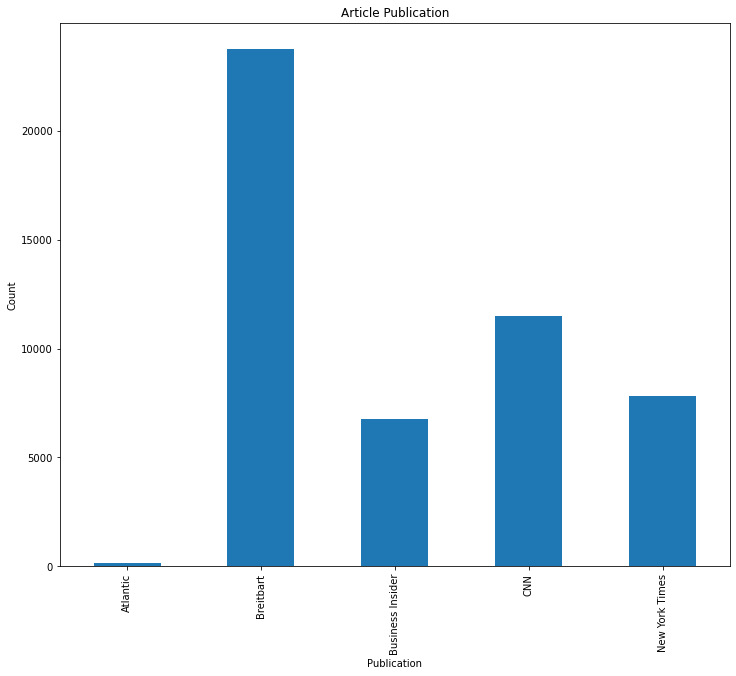

In [30]:
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', figsize=(12,10))
##Plots in a bar graph the publications
ax.set_title('Article Publication')
##Titles whole chart
ax.set_xlabel('Publication')
##Give x-axis title
ax.set_ylabel('Count');
##gives y-axis title
plt.show()
##Plots graph and shows graph

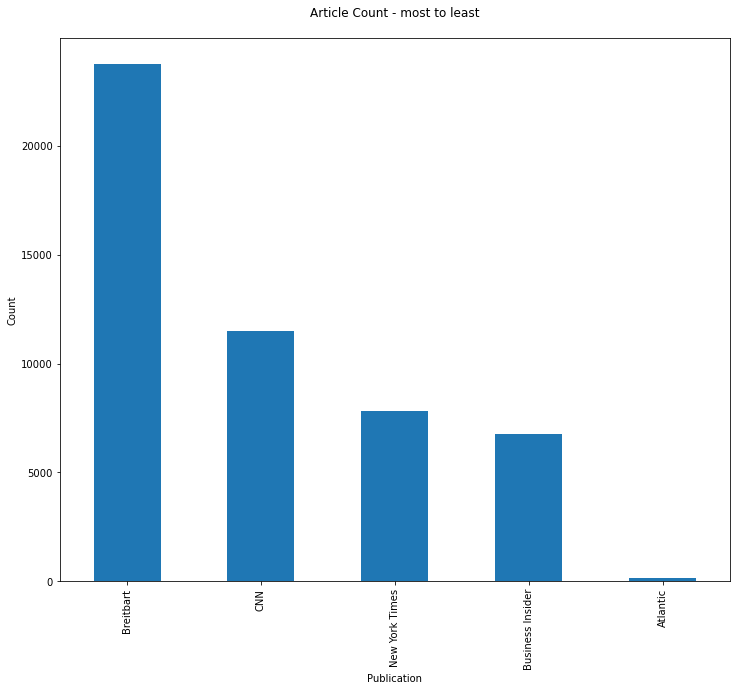

In [32]:
ax = articles['publication'].value_counts().plot(kind='bar', figsize=(12,10))
##Plots in a bar graph the publications sorts from least to greatest by counts
ax.set_title('Article Count - most to least\n')
##Titles whole chart
ax.set_xlabel('Publication')
##Give x-axis title
ax.set_ylabel('Count');
##gives y-axis title
plt.show()
##Plots graph and shows graph

In [33]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)
##Function to remove all punctuation from text and also make all words lower case

In [34]:
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
##Applies clean_text function to the content portion of the df and assigns it to a new array
print("clean text:  ",articles['tokenized'].head(10))
##prints first 10 files for the new array of 'cleaned' text

clean text:   0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
5    london queen elizabeth ii who has been battlin...
6    beijing president tsai of taiwan sharply criti...
7    danny cahill stood slightly dazed in a blizzar...
8    just how is hillary kerr the founder of a digi...
9    angels are everywhere in the muñiz familys apa...
Name: tokenized, dtype: object


In [35]:
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
##seperates each entry and applies different function operations to each line individually

In [36]:
print("Max:  ",articles['num_wds'].max())
##Finds Maximum number of words

Max:   24736


In [37]:
print("Min:  ",articles['num_wds'].min())
##Finds minimum number of words

Min:   0


In [38]:
print("Mean:  ",articles['num_wds'].mean())
##Finds average number of words

Mean:   636.26046


In [39]:
len(articles[articles['num_wds']==0])
##Finds the number of articles with 0 words in it

65

In [41]:
articles = articles[articles['num_wds']>0]
##replaces old df with new df where all entrys have more than 0 words
articles

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers...",as chairman and ceo of exxonmobil rex tillerso...,957
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...,ive spent nearly 20 years looking at intellige...,984
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...,donald trump will not be taking necessary ste...,9573
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...,dozens of colleges could be forced to close in...,1163


In [42]:
articles.head(10)
##prints top 10 articles in df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",london queen elizabeth ii who has been battlin...,158
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,beijing president tsai of taiwan sharply criti...,568
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz...",danny cahill stood slightly dazed in a blizzar...,3168
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ...",just how is hillary kerr the founder of a digi...,1595
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...,angels are everywhere in the muñiz familys apa...,811


In [43]:
print("New Mean:  ",articles['num_wds'].mean())
##finds mean number of words with empty articles removed

New Mean:   637.0886752778612


In [44]:
print("new min:  ",articles['num_wds'].min())
##finds new minimum number of words with empty articles removed

new min:   1


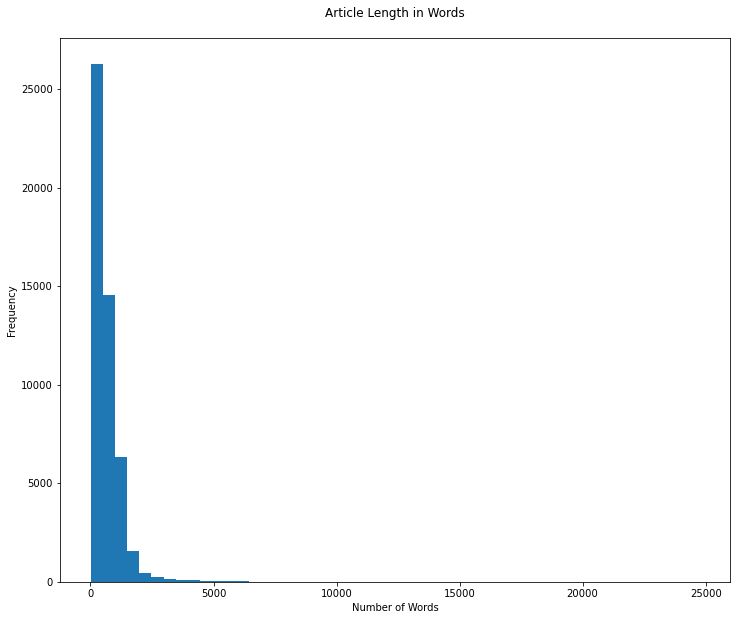

In [51]:
ax=articles['num_wds'].plot(kind='hist', bins=50, figsize=(12,10))
##plots histogram and sets bins to high number so as to identify if there are any outliers
ax.set_title('Article Length in Words\n')
##Titles whole chart
ax.set_xlabel('Number of Words')
##Give x-axis title
ax.set_ylabel('Frequency')
##gives y-axis title
plt.show()
##Plots graph and shows graph